<a href="https://colab.research.google.com/github/shachi-i/Lepton-Classification/blob/main/model_lepton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/preprocessed_data.csv")

In [3]:
print(df.columns)

Index(['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'pvxp_n',
       'vxp_z', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON',
       'scaleFactor_BTAG', 'scaleFactor_TRIGGER', 'scaleFactor_JVFSF',
       'scaleFactor_ZVERTEX', 'trigE', 'trigM', 'passGRL', 'hasGoodVertex',
       'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta',
       'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_flag',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'alljet_n',
       'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_m', 'jet_jvf',
       'jet_trueflav', 'jet_truthMatched', 'jet_SV0', 'jet_MV1'],
      dtype='object')


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
runNumber,58671.0,2.075320e+05,0.000000e+00,2.075320e+05,2.075320e+05,2.075320e+05,2.075320e+05,2.075320e+05
eventNumber,58671.0,2.502060e+07,1.643453e+07,1.064000e+03,1.607886e+07,2.841334e+07,3.782968e+07,7.019617e+07
channelNumber,58671.0,2.075320e+05,0.000000e+00,2.075320e+05,2.075320e+05,2.075320e+05,2.075320e+05,2.075320e+05
mcWeight,58671.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pvxp_n,58671.0,9.311125e+00,2.690478e+00,1.000000e+00,7.000000e+00,9.000000e+00,1.100000e+01,2.300000e+01
vxp_z,58671.0,-1.050383e+01,4.906938e+01,-1.995510e+02,-4.417670e+01,-1.057489e+01,2.296547e+01,1.878763e+02
scaleFactor_PILEUP,58671.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
scaleFactor_ELE,58671.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
scaleFactor_MUON,58671.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
scaleFactor_BTAG,58671.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Target Variable Distribution

Text(0.5, 1.0, 'Jet Truth Match Distribution')

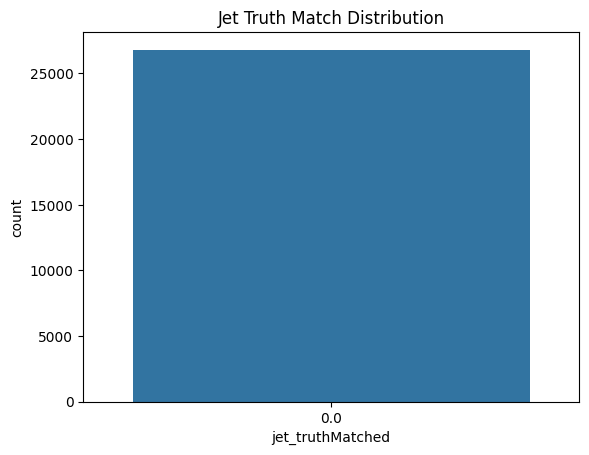

In [6]:
sns.countplot(x='jet_truthMatched', data=df)
plt.title("Jet Truth Match Distribution")


Missing Value Heatmap

<Axes: >

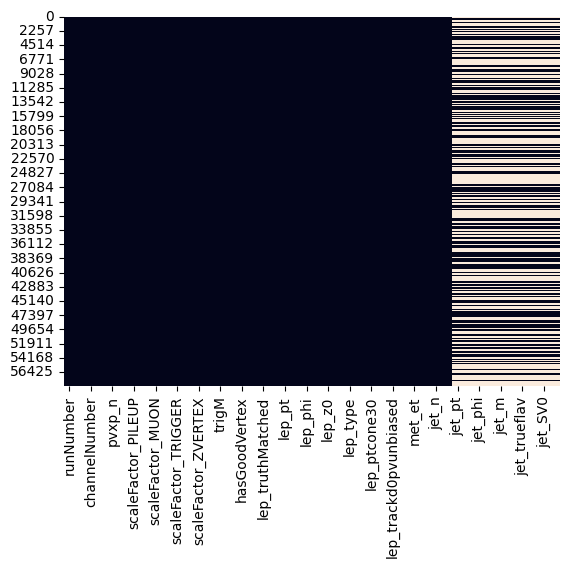

In [7]:
sns.heatmap(df.isnull(), cbar=False)


Correlation Heatmap

<Axes: >

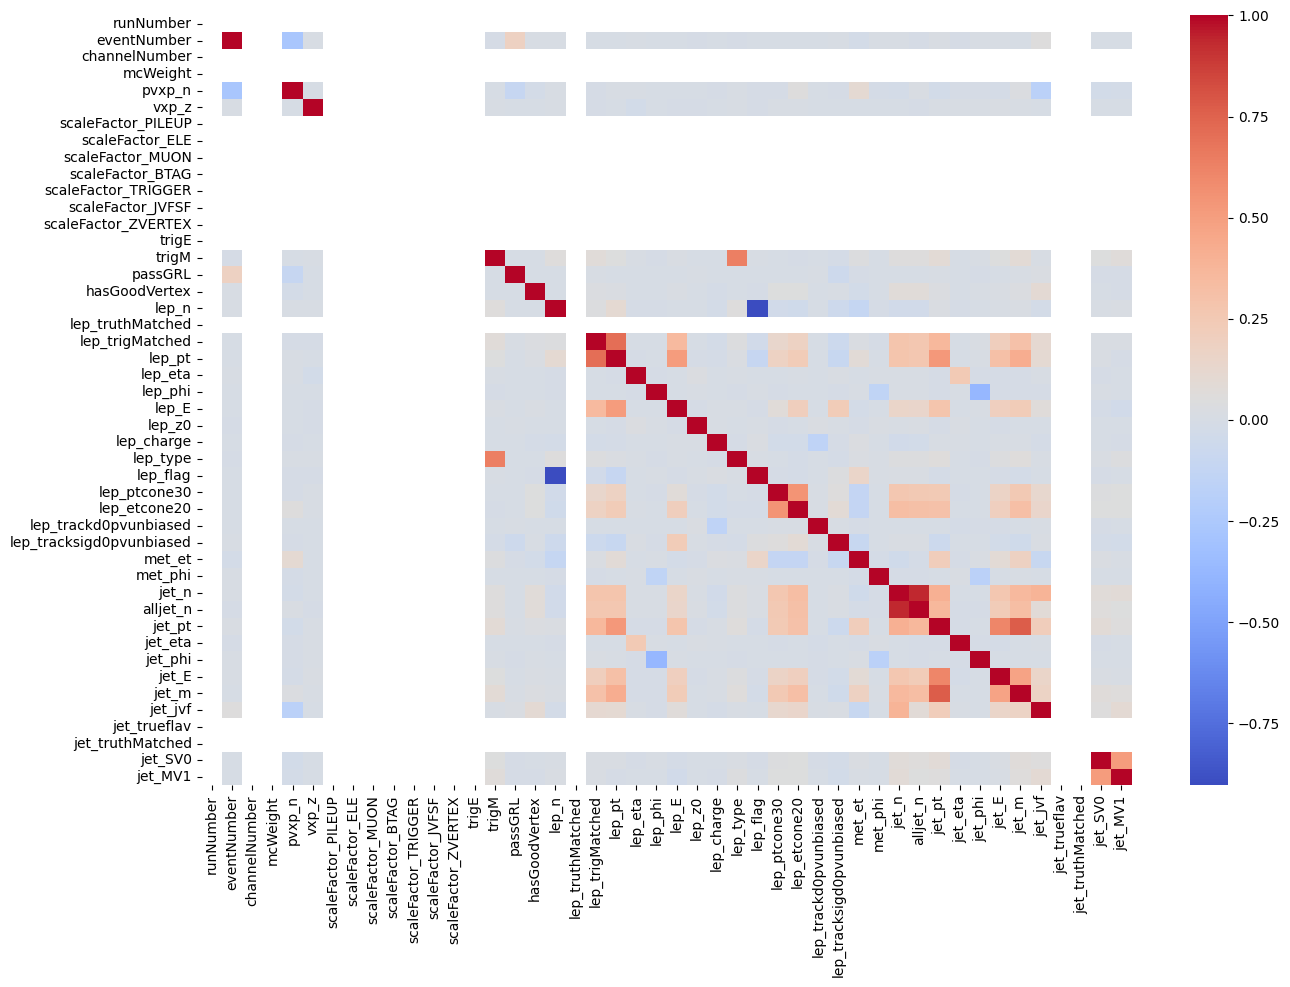

In [8]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)


Feature Distributions

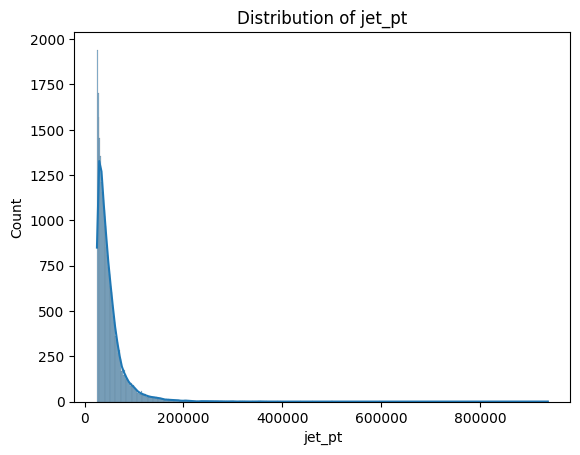

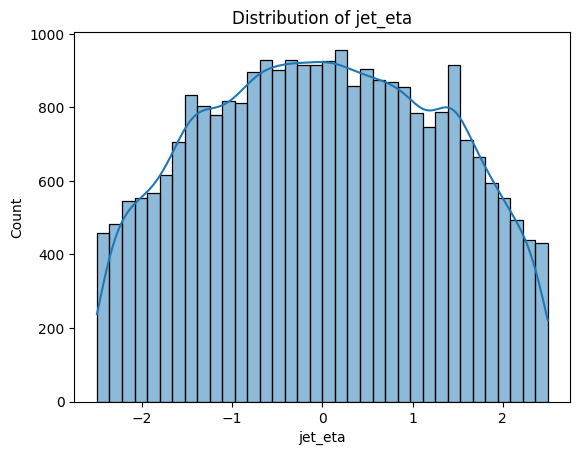

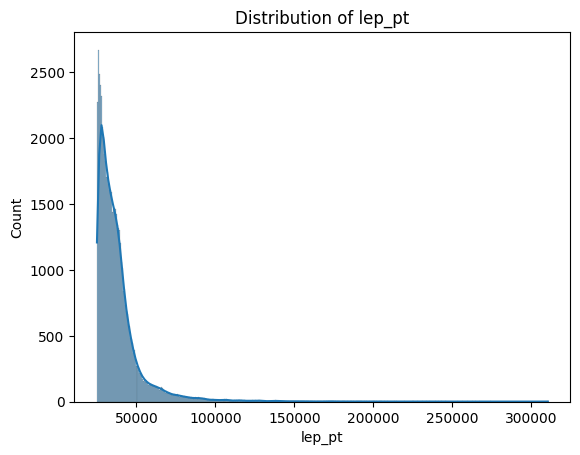

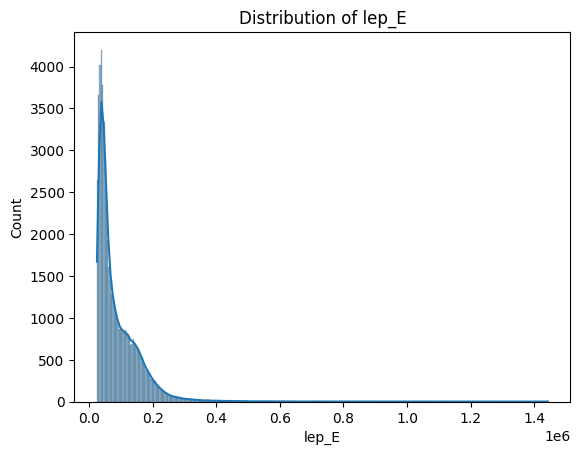

In [9]:
for col in ['jet_pt', 'jet_eta', 'lep_pt', 'lep_E']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Pairplot of Important Variables

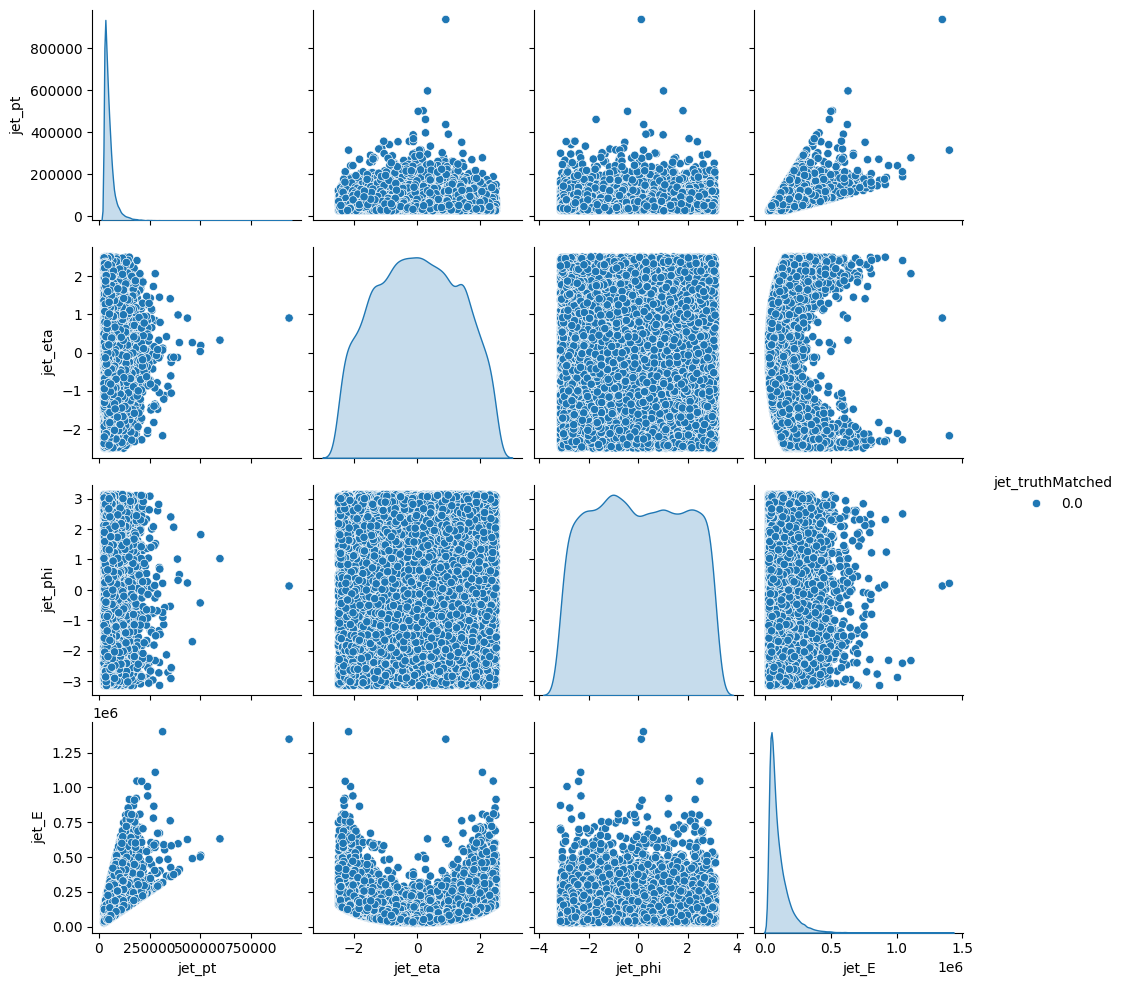

In [10]:
sns.pairplot(df[['jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_truthMatched']], hue='jet_truthMatched')


In [11]:
print(df['lep_type'].value_counts())


lep_type
11    58636
13       35
Name: count, dtype: int64


In [12]:
print(df[['lep_E', 'lep_pt', 'lep_eta', 'lep_charge']].describe())


              lep_E         lep_pt       lep_eta    lep_charge
count  5.867100e+04   58671.000000  58671.000000  58671.000000
mean   8.808278e+04   38031.578698      0.009859      0.089465
std    6.800649e+04   15580.349004      1.392202      0.995998
min    2.509493e+04   25000.144531     -2.498293     -1.000000
25%    4.125271e+04   28887.870117     -1.085272     -1.000000
50%    6.248337e+04   34204.074219      0.024874      1.000000
75%    1.190614e+05   41053.570312      1.102008      1.000000
max    1.442662e+06  310421.968750      2.492399      1.000000


In [13]:
df['high_energy_forward_lepton'] = (
    (df['lep_E'] > 100000) &          # High energy
    (df['lep_eta'].abs() > 1.0) &     # Forward lepton
    (df['lep_pt'] > 40000)            # High transverse momentum
).astype(int)


In [14]:
df['high_energy_forward_lepton'].value_counts()


,count
high_energy_forward_lepton,
0,51749
1,6922


In [15]:
label_column = 'high_energy_forward_lepton'


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=[label_column])
y = df[label_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


X_train_imputed = imputer.fit_transform(X_train)


In [19]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)


print("Shape after SMOTE:")
print(X_resampled.shape)
print(y_resampled.shape)

Shape after SMOTE:
(82768, 46)
(82768,)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9953131657435024
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10365
           1       0.96      1.00      0.98      1370

    accuracy                           1.00     11735
   macro avg       0.98      1.00      0.99     11735
weighted avg       1.00      1.00      1.00     11735



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Since the accuracy is too perfect, we aim to find a reason

In [22]:
features_to_exclude = ['lep_E', 'lep_pt', 'lep_eta', 'high_energy_forward_lepton']
X1 = df.drop(columns=features_to_exclude)
y1= df['high_energy_forward_lepton']


In [25]:
indirect_features = [
    'lep_phi', 'lep_z0', 'lep_charge', 'lep_type', 'lep_flag',
    'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
    'lep_tracksigd0pvunbiased',
    'lep_truthMatched', 'lep_trigMatched',

    'jet_n', 'alljet_n',
    'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_m', 'jet_jvf',
    'jet_trueflav', 'jet_truthMatched', 'jet_SV0', 'jet_MV1',

    'met_et', 'met_phi',

    'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON',
    'scaleFactor_BTAG', 'scaleFactor_TRIGGER', 'scaleFactor_JVFSF',
    'scaleFactor_ZVERTEX',

    'trigE', 'trigM', 'passGRL', 'hasGoodVertex',
    'pvxp_n', 'vxp_z'
]


In [26]:
X1 = df[indirect_features]
y1 = df['high_energy_forward_lepton']


In [27]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, stratify=y1, random_state=42
)


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Imputation
imputer = SimpleImputer(strategy='mean')
X1_train_imputed = imputer.fit_transform(X1_train)
X1_test_imputed = imputer.transform(X1_test)

# Scaling
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train_imputed)
X1_test_scaled = scaler.transform(X1_test_imputed)

# SMOTE
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1_train_scaled, y1_train)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X1_resampled, y1_resampled)

y1_pred = clf.predict(X1_test_scaled)
print(classification_report(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10351
           1       0.51      0.33      0.40      1384

    accuracy                           0.88     11735
   macro avg       0.71      0.64      0.67     11735
weighted avg       0.87      0.88      0.87     11735



XGBoost

In [30]:
pip install xgboost


In [33]:
scale_pos_weight = len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1])
print("Scale Pos Weight:", scale_pos_weight)

Scale Pos Weight: 7.475261827374504


In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


xgb_clf = XGBClassifier(


    scale_pos_weight=len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1]),  # handle class imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


xgb_clf.fit(X1_resampled, y1_resampled)


y_pred_xgb = xgb_clf.predict(X1_test_imputed)


print("XGBoost Classifier Report:\n")
print(classification_report(y1_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Report:

              precision    recall  f1-score   support

           0       0.89      0.06      0.11     10351
           1       0.12      0.95      0.21      1384

    accuracy                           0.16     11735
   macro avg       0.50      0.50      0.16     11735
weighted avg       0.80      0.16      0.12     11735



In [34]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    class_weight='balanced'
)


In [36]:

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    class_weight='balanced'
)


model.fit(X1_resampled, y1_resampled)

# Predict
y1_pred = model.predict(X1_test)

# Evaluation
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:")
print(classification_report(y1_test, y1_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.35926714955262035
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.31      0.46     10351
           1       0.13      0.75      0.22      1384

    accuracy                           0.36     11735
   macro avg       0.51      0.53      0.34     11735
weighted avg       0.81      0.36      0.43     11735

